In [713]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

# Lendo Data Set

In [564]:
Linha = pd.read_csv('dataLinha_sem_times.csv')

# Analise Exploratoria

In [639]:
position=[]
positionGeneral=['Defesa', 'Meio de Campo', 'Ataque']

priceGeneral=[]

for a in Linha.Position:
    if a not in position:
        position.append(a)

In [640]:
defenders=0
midfield=0
attack=0

for a,price in enumerate(Linha.Price):
    if Linha.Position.iloc[a]=='Centre-Back' or Linha.Position.iloc[a]=='Left-Back' or Linha.Position.iloc[a]=='Right-Back':
        defenders+=price
        
priceDefenders=defenders/(len(Linha[Linha.Position=='Left-Back']) + len(Linha[Linha.Position=='Right-Back']) + len(Linha[Linha.Position=='Centre-Back']))
priceGeneral.append(priceDefenders)


for a,price in enumerate(Linha.Price):
    if Linha.Position.iloc[a]=='Defensive Midfield' or Linha.Position.iloc[a]=='Central Midfield' or Linha.Position.iloc[a]=='Attacking Midfield' or Linha.Position.iloc[a]=='Left Midfield' or Linha.Position.iloc[a]=='Right Midfield':
        midfield+=price
        
priceMidfield= midfield/(len(Linha[Linha.Position=='Defensive Midfield']) + len(Linha[Linha.Position=='Central Midfield']) + len(Linha[Linha.Position=='Attacking Midfield']) + len(Linha[Linha.Position=='Left Midfield']) + len(Linha[Linha.Position=='Right Midfield']))
priceGeneral.append(priceMidfield)


for a,price in enumerate(Linha.Price):
    if Linha.Position.iloc[a]=='Left Winger' or Linha.Position.iloc[a]=='Right Winger' or Linha.Position.iloc[a]=='Centre-Forward' or Linha.Position.iloc[a]=='Second Striker':
        attack+=price
        
priceAttack= attack/(len(Linha[Linha.Position=='Left Winger']) + len(Linha[Linha.Position=='Right Winger']) + len(Linha[Linha.Position=='Centre-Forward']) + len(Linha[Linha.Position=='Second Striker']))
priceGeneral.append(priceAttack) 

<BarContainer object of 3 artists>

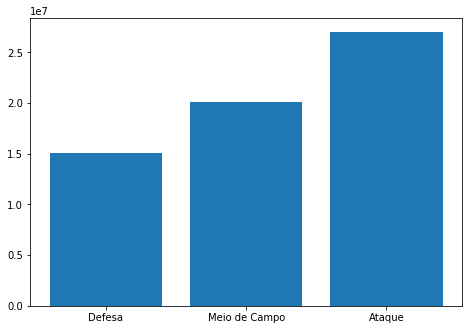

In [642]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(positionGeneral,priceGeneral)

Para este gráfico os jogadores de defesa foram separados no grupo 'Defesa', todos os meio campistas foram separados no grupo 'Meio de Campo' e os atacantes no grupo 'Ataque'. Com este gráfico percebemos claramente que os atacantes são, em média, os jogadores mais caros em quanto os defensores os mais baratos.

In [659]:
precoPorPosicao={}
for a in position:
    precoPorPosicao[a]=Linha[Linha.Position==a].Price.mean()
    
print(precoPorPosicao)

{'Centre-Back': 16319852.94117647, 'Left-Back': 13850000.0, 'Right-Back': 13546323.529411765, 'Defensive Midfield': 17120689.655172415, 'Central Midfield': 18759433.96226415, 'Attacking Midfield': 33687500.0, 'Left Winger': 36227272.72727273, 'Right Winger': 30825000.0, 'Centre-Forward': 20880681.818181816, 'Left Midfield': 12166666.666666666, 'Right Midfield': 11000000.0, 'Second Striker': 20000000.0}


In [660]:
Linha.Position.value_counts()

Centre-Back           68
Central Midfield      53
Centre-Forward        44
Right-Back            34
Left-Back             30
Defensive Midfield    29
Left Winger           22
Right Winger          20
Attacking Midfield    16
Left Midfield          6
Right Midfield         2
Second Striker         1
Name: Position, dtype: int64

In [667]:
highestPosition=''
lowestPosition=''
highestPrice=0
lowestPrice=1000000000000000

for key, value in precoPorPosicao.items() :
    if key != 'Left Midfield' and key != 'Right Midfield' and key != 'Second Striker':
        if value>highestPrice:
            highestPrice=value
            highestPosition=key
        if value<lowestPrice:
            lowestPrice=value
            lowestPosition=key

            
print('A posição com o MAIOR preço médio, com mais de 6 jogadores presentes na posição, são os {} com um preço médio de aproximadamente {} dollares'.format(highestPosition,round(highestPrice,0)))
print('A posição com o MENOR preço médio, com mais de 6 jogadores presentes na posição, são os {} com um preço médio de aproximadamente {} dollares'.format(lowestPosition,round(lowestPrice,0)))

A posição com o MAIOR preço médio, com mais de 6 jogadores presentes na posição, são os Left Winger com um preço médio de aproximadamente 36227273.0 dollares
A posição com o MENOR preço médio, com mais de 6 jogadores presentes na posição, são os Right-Back com um preço médio de aproximadamente 13546324.0 dollares


In [674]:
maior_desvio=''
menor_desvio=''
maior_desvio_num=0
menor_desvio_num=100000000000000000

for a in position:
    if a != 'Left Midfield' and a != 'Right Midfield' and a != 'Second Striker':
        if Linha[Linha.Position==a].Price.std() > maior_desvio_num:
            maior_desvio=a
            maior_desvio_num=Linha[Linha.Position==a].Price.std()
        if Linha[Linha.Position==a].Price.std() < menor_desvio_num:
            menor_desvio=a
            menor_desvio_num=Linha[Linha.Position==a].Price.std()
            
print(maior_desvio, maior_desvio_num)
print(menor_desvio, menor_desvio_num)

Left Winger 39496753.11330675
Left-Back 14083586.680711113


In [719]:
precoLW=[]
precoLB=[]

for a in Linha[Linha.Position=='Left Winger'].Price:
    precoLW.append(a)
    
for a in Linha[Linha.Position=='Left-Back'].Price:
    precoLB.append(a)
    
print(len(precoLW))

22


In [723]:
Position=[]
PricesLWB=[]

for a in range(22):
    Position.append('Left Winger')
for a in range(30):
    Position.append('Left Back')
    
for a in precoLW:
    PricesLWB.append(a)
for a in precoLB:
    PricesLWB.append(a)
    
print(len(PricesLWB))

52


In [726]:
BoxplotDataLWB= pd.DataFrame()
BoxplotDataLWB['Position']=Position
BoxplotDataLWB['Price']=PricesLWB

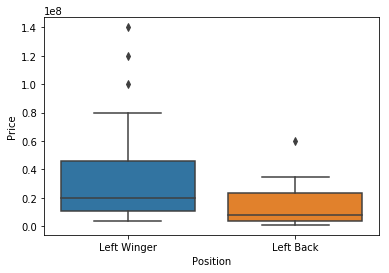

In [727]:
sns.boxplot(x='Position', y='Price', data=BoxplotDataLWB)

Adicionalmente, a posição que tem maior desvio padrão em relação ao seu preço, em relação a todas com mais de 6 jogadores, são os Left Wingers enquanto os com menor desvio padrão são os Left Backs. Quando os preços de jogadores estão tão dispersos quanto no caso dos Left Wingers, isto pode afetar o potencial para acerto do modelo que será criado. Claro, existem diversas outras variaveis que ajudam a determinar o preço final, contudo uma dispersão tão grande não vai ajudar tanto este modelo.

# Dummies

In [565]:
LinhaDummies_P=pd.get_dummies(Linha.Position)
LinhaDummies_T=pd.get_dummies(Linha.Team)

In [566]:
Linha_Dummies=pd.concat([Linha,LinhaDummies_P,LinhaDummies_T],axis='columns')

In [567]:
Linha_Dummies=Linha_Dummies.drop(columns=['Position','Team'])

Com esta função 'get_dummies' as duas variáveis qualitativas do dataset (time e posição de um jogador) são substituidas por representações quantitativa para posteriormente o RandomForest poder analisar os dados. Um novo dataset foi criado com as versões quantitativas da posição e time dos jogadores.

# Preparo para RandomForest

In [568]:
columnsSelect_L=[]

for a in Linha_Dummies.columns:
    if a != 'Price' and a != 'Unnamed: 0':
        columnsSelect_L.append(a)

In [569]:
XLt=Linha_Dummies[columnsSelect_L]
yLt=Linha_Dummies['Price']

In [570]:
XLt_train, XLt_test, yLt_train, yLt_test = train_test_split(XLt, yLt, test_size=0.2)

Nesta parte os dados para treino e para teste do algoritmo foram separados, com 80% dos dados utilizados para treinamento e 20% para teste. A variavel dependente, que está tentando ser prevista, foi definida como o preço do jogador. Este preço, portanto, depende de todas as outras variáveis presentes no dataset.

# Regression

Em primeiro lugar foi tentado um modelo de regressão no RandomForest para prever o preço exato do jogador. 

In [571]:
modeloRegress = RandomForestRegressor(n_jobs=2)
modeloRegress.fit(XLt_train,yLt_train)

/Users/EduardoGoncalves/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [586]:
PredictLinhaTeste=pd.DataFrame()

PredictLinhaTeste['Preco_Real']=yLt_test
PredictLinhaTeste['Preco_Predict']=modeloRegress.predict(XLt_test)

In [587]:
distancia=[]
i=0

while i<len(PredictLinhaTeste.Preco_Real):
    dist=abs(PredictLinhaTeste.Preco_Real.iloc[i]-PredictLinhaTeste.Preco_Predict.iloc[i])
    distancia.append(dist)
    i+=1
    
soma=0

for a in distancia:
    soma+=a
    
media_distancia=soma/len(distancia)

In [588]:
print(round(media_distancia,0))

11924308.0


In [591]:
print(yLt_train.mean())

20337403.846153848


Claramente, nota-se que este modelo não é efetivo pois tem-se que a média dos preços dos jogadores é de cerca de 20 milhões, mas, utilizando-se o método do Mean Absolute Error (MAE), descobre-se que os valores previstos pelo RandomForest para o preço dos jogadores é aproximadamente 12 milhões distantes do seu valor real. Então outro modo de prever preço teve que ser criado.

# Modelo A, M, B

O modelo A, M, B se refere a atribuir 'A' para os jogadores com preços altos, 'M' para jogadores com preços médios e 'B' para jogadores com preços baixos. O valor alto foi definido como um valor superior aos 75% dos primeiros valores (em ordem de menor a maior) do dataset inteiro, o baixo como aquele inferiore aos primeiros 25% e o médios entre estre ou igual a estes dois valores. Com isso, faz-se uma regressão para definir se o preço do jogador será 'A', 'M' ou 'B'.

In [575]:
Linha_Dummies.Price.describe()

count    3.250000e+02
mean     1.988562e+07
std      2.477870e+07
min      7.500000e+04
25%      6.000000e+06
50%      1.100000e+07
75%      2.500000e+07
max      1.500000e+08
Name: Price, dtype: float64

In [576]:
Linha_Dummies_Copy=Linha_Dummies

In [577]:
priceC=[]
for a in Linha_Dummies_Copy.Price:
    if a >= 6000000.0 and a <= 25000000.0:
        priceC.append('M')
    elif a > 25000000.0:
        priceC.append('A')
    else:
        priceC.append('B')

In [578]:
Linha_Dummies_Copy['PriceC']=priceC

In [579]:
XL_n=Linha_Dummies_Copy[columnsSelect_L]
yL_n=Linha_Dummies_Copy['PriceC']

XL_n_train, XL_n_test, yL_n_train, yL_n_test = train_test_split(XL_n, yL_n, test_size=0.2)

In [592]:
modeloClassifier= RandomForestClassifier(n_jobs=2)
modeloClassifier.fit(XL_n_train,yL_n_train)
print()

/Users/EduardoGoncalves/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [593]:
PredictLinhaTeste=pd.DataFrame()

PredictLinhaTeste['Preco_Real']=yL_n_test
PredictLinhaTeste['Preco_Predict']=modeloClassifier.predict(XL_n_test)

In [582]:
acertos=0

for a,b in enumerate(PredictLinhaTeste.Preco_Real):
    if b==PredictLinhaTeste.Preco_Predict.iloc[a]:
        acertos+=1
        
acuracia = acertos/len(PredictLinhaTeste.Preco_Real)

print(acuracia*100)

50.76923076923077


Com este modelo a accuracia do teste subiu. Neste caso houve cerca de 50% de acerto. Mesmo assim os valores não são muito altos. Portanto, tentou-se ou outro método.

# Modelo Misto

O modelo misto é uma mistura de ambas formas. Primeiro é pego o valor previsto pelo primeiro método, com o valor exato do preço. Este preço então é convertido em 'A', 'M' ou 'B'. Isto então é comparado com os valores 'A', 'M' ou 'B' dos valores de teste para então se obter o resultado.

In [583]:
predictL=[]

for a in modeloRegress.predict(XL_n_test):
    if a >= 6000000.0 and a <= 25000000.0:
        predictL.append('M')
    elif a > 25000000.0:
        predictL.append('A')
    else:
        predictL.append('B')

In [594]:
PredictLinhaTeste=pd.DataFrame()

PredictLinhaTeste['Preco_Real']=yL_n_test
PredictLinhaTeste['Preco_Predict']=predictL

In [595]:
acertos=0

for a,b in enumerate(PredictLinhaTeste.Preco_Real):
    if b==PredictLinhaTeste.Preco_Predict.iloc[a]:
        acertos+=1
        
acuracia = acertos/len(PredictLinhaTeste.Preco_Real)

print(acuracia*100)

83.07692307692308


Com este modelo a acuracia sobe significativamente para 83%. Considerando que o preço de um jogador tem innumeros fatores que influenciam, incluido muitos que não estão no dataset como tendencia de lesões, dados da carreira toda, em que times jogaram no passado, dribles, potencial, entre muitos outros, uma acurácia de 83% para este modelo é surpreendentemente positivo.